In [3]:
import numpy as np
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

### Load and normalize the numeric data 

In [4]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


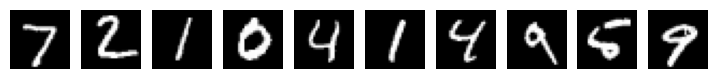

In [5]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model for the numeric data set 

In [6]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

### Train the autoencoder model.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 13s 23ms/step - loss: 0.1905 - val_loss: 0.1352
Epoch 2/10
469/469 [==============================] - 10s 20ms/step - loss: 0.1249 - val_loss: 0.1150
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1124 - val_loss: 0.1081
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1063 - val_loss: 0.1035
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1028 - val_loss: 0.1011
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1004 - val_loss: 0.0992
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0986 - val_loss: 0.0976
Epoch 8/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0971 - val_loss: 0.0971
Epoch 9/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0959 - val_loss: 0.0958
Epoch 10/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0949 -

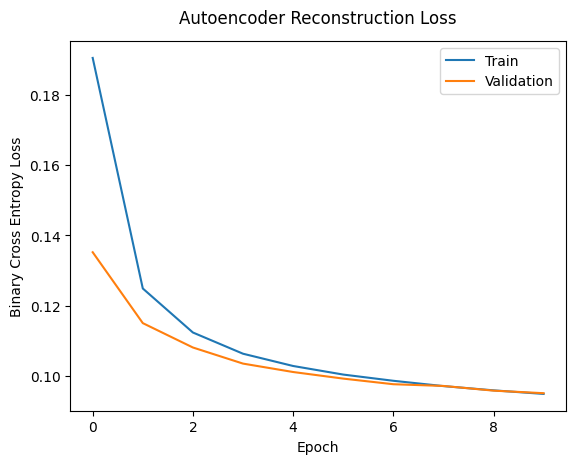

In [8]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 4ms/step


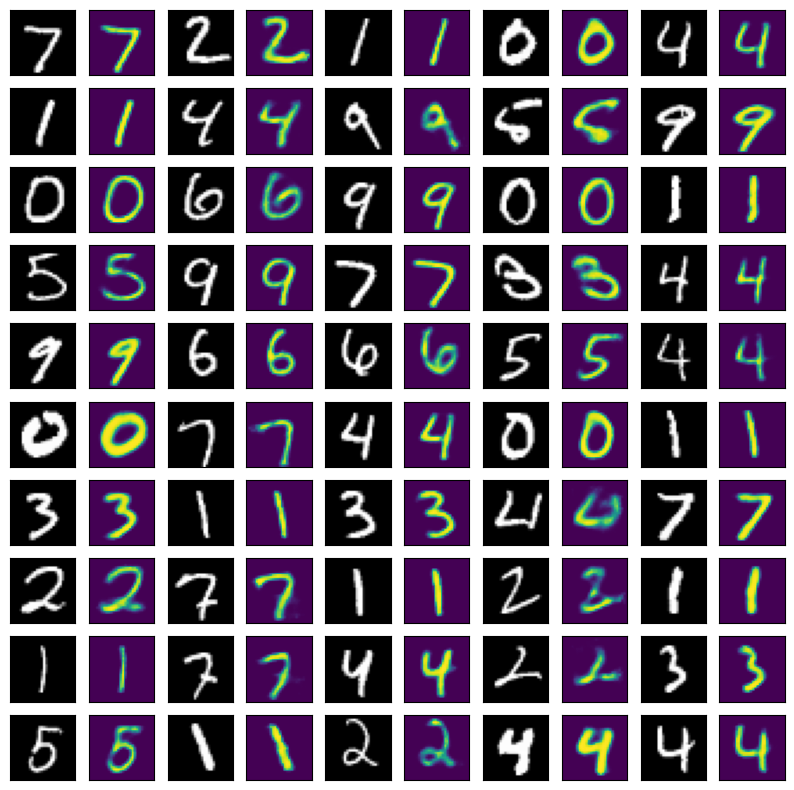

In [9]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Loading my image and testing the autoencoder on this image

In [10]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therefore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Load and preprocess the new images
new_images = []
for i in range(1, 6):
    img_path = os.path.join(r"C:\Users\risha\OneDrive\Desktop\New folder (2)", f"img{i}.png")
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img = image.img_to_array(img) / 255
    img = img.reshape(784)
    new_images.append(img)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


## Training the autoencoder model 

In [13]:
from sklearn.utils import resample

# Oversample the new images
new_images_oversampled = resample(new_images, replace=True, n_samples=len(train_images))

# Combine the new images with the original MNIST training data
combined_train_images = np.vstack((train_images, new_images_oversampled))
print(combined_train_images.shape)

# Shuffle the combined training data
np.random.shuffle(combined_train_images)

# Split the combined training data into train and validation sets
split_idx = int(len(combined_train_images) * 0.8)
train_images = combined_train_images[:split_idx]
val_images = combined_train_images[split_idx:]

from tensorflow import keras
from tensorflow.keras import layers

# Define the autoencoder model
input_shape = (784,)
code_size = 64
autoencoder1 = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dense(code_size, activation='relu', name='code'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(784, activation='sigmoid')
])

autoencoder1.summary()

autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')

from tensorflow.keras.callbacks import EarlyStopping

# Train the autoencoder
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history1 = autoencoder1.fit(
    x=train_images,
    y=train_images,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(val_images, val_images),
    callbacks=[early_stop]
)


(120000, 784)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 code (Dense)                (None, 64)                16448     
                                                                 
 dense_10 (Dense)            (None, 256)               16640     
                                                                 
 dense_11 (Dense)            (None, 512)               131584    
                                                                 
 dense_12 (Dense)            (None, 784)               402192    
                                                                 
Total params: 1,100,112
Trainable params

In [14]:
#saving the autoencoder 
autoencoder.save('WE11_autoencoder.h5')

## Testing the autoencoder model

3000/3000 [==============================] - 14s 5ms/step


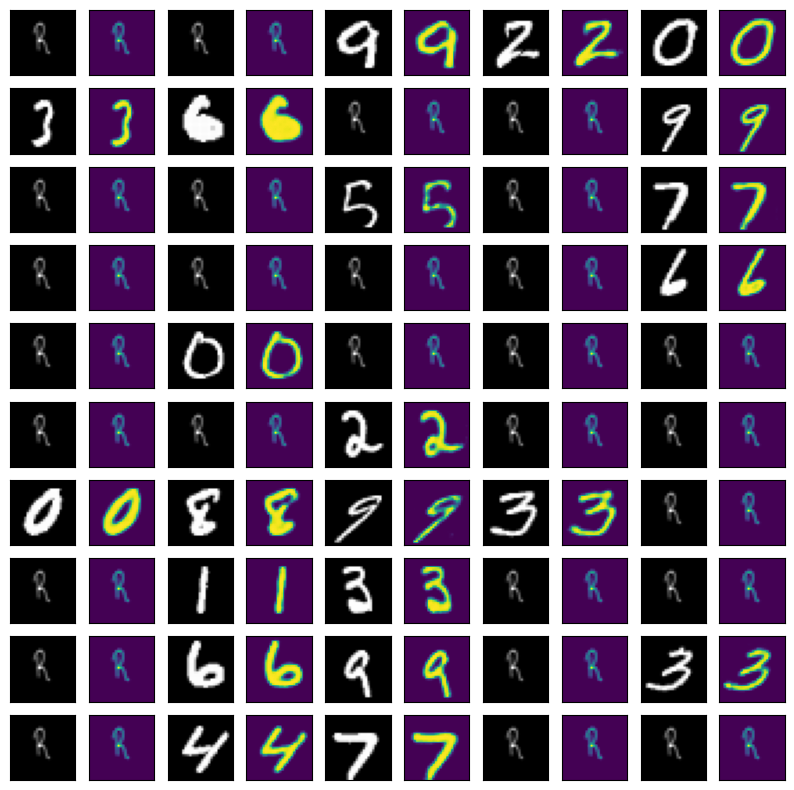

In [15]:
reconstructed_images = autoencoder1.predict(train_images)

images = []
for i in range(100):
    images.append(train_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

## Test the autoencoder on the new image 

1/1 [==============================] - 0s 208ms/step
(1, 784)


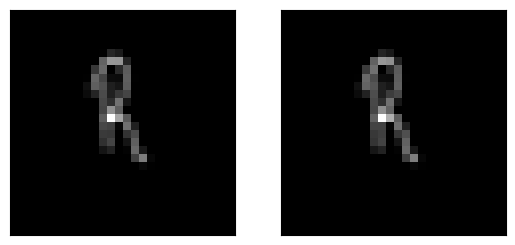

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img(r"C:\Users\risha\OneDrive\Desktop\New folder (2)\img1.png", target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder1.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


## Conclusion 

### As we can see from the output, the autoenconder model does a pretty good job in predicting and reconstructing both the numeric dataset attributes and the new image which is the inital of my name. As a result, the autoencoder has successfully learnt how to encode our dataset, which comprises of MNIST data and the  image provided, and can now reconstruct these inputs even with the compressed representations.